In [1]:
import numpy as np
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import graph_tool as gt
import networkx as nx
import os
import random
import csv
import graphviz as gv
from PIL import Image

In [2]:
# use this to import sociopatterns data
def import_temporal_networks(filename, delimiter):
    temporalEdgeList = dict()
    nodes = set([])
    with open(filename) as contactData:
        contactList = csv.reader(contactData, delimiter=delimiter)
        for contact in contactList:
            t = float(contact[0])
            i = int(contact[1])
            j = int(contact[2])
            nodes.add(i)
            nodes.add(j)
            try:
                temporalEdgeList[t].extend([(i,j), (j,i)])
            except:
                temporalEdgeList[t] =[(i,j), (j,i)]
    return nodes, temporalEdgeList

nodes, edgeList = import_temporal_networks("Data/School/High-School_data_2013.csv", " ")

default_node_attrs = {'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
nodeList = dict({n:dict(default_node_attrs) for n in nodes})

for i in [1]:
    to_infect = set([])
    to_recover = set([])
    for i in range(50):#random.randrange(5)):
        
        to_infect.add(random.randrange(len(nodes)))
        to_recover.add(random.randrange(len(nodes)))
    for node in nodeList:
        if node in to_infect:
            
            #print(i, to_infect, 'before ', nodeList[time][to_infect])
            nodeList[node]['status'] = 'I'
            nodeList[node]['infect_prob'] = round(random.random(), 4)
        elif node in to_recover:
            
            #print(i, to_infect, 'before ', nodeList[time][to_infect])
            nodeList[node]['status'] = 'R'
            nodeList[node]['infect_prob'] = 0.0
        
        else:
            nodeList[node]['status'] = 'S'
            nodeList[node]['infect_prob'] = 0.0
        print(nodeList[node])
        nodeList.update({node: nodeList[node]})
    #print(nodeList)
        
#for n in nodeList.keys():
    #print(nodeList[n])


{'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'I', 'infect_time': -1, 'infect_prob': 0.983, 'remove_time': -1}
{'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'R', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'R', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'I', 'infect_time': -1, 'infect_prob': 0.3371, 'remove_time': -1}
{'status': 'S', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'R', 'infect_time': -1, 'infect_prob': 0.0, 'remove_time': -1}
{'status': 'I', 'infect_time': -1, 'infect_prob': 0.0424, 'remove_time': -1}
{'status': 'S', 'infect_time':

In [165]:
def drawContagion(edgeList, nodeList, ts, exp_name = '', layout = None):
    
    if not os.path.exists('output/' + exp_name):
        os.makedirs('output/' + exp_name)
    
    plt.figure()
    pos = None
    #for ts in [list(edgeList.keys())[0]]: #list(edgeList.keys())):
    print('Drawing the graph for time ' + str(ts))
        
    I = []
    S = []
    R = []
        
    G = nx.Graph()
    G.add_nodes_from(list(nodeList.keys()))
    #print('Nodes: ', G.nodes())
    #print(edgeList[ts])
    G.add_edges_from(edgeList[ts])
    #nx.draw(G)
    G_gv = nx.nx_agraph.to_agraph(G)
    #print(G_gv.get_node('0'))
    
    for node, vals in nodeList.items():
        if vals['status'] == 'I':
            G_gv.get_node(str(node)).attr['fillcolor']="Orange"
            #G_gv.get_node(str(node)).attr['label'] = 'I'
        elif vals['status'] == 'S':
            G_gv.get_node(str(node)).attr['fillcolor']="Yellow"
            #G_gv.get_node(str(node)).attr['label'] = 'S'
        elif vals['status'] == 'R':
            G_gv.get_node(str(node)).attr['fillcolor']="White"
            #G_gv.get_node(str(node)).attr['label'] = 'R'
    #print(edgeList[ts])
    for edge in edgeList[ts]:
        #print(edge[0], edge[1])
        G_gv.get_edge(edge[0], edge[1]).attr['color']='green' #"#%2x0000" % (i * 16)
        
    if layout is None:
        layout = G_gv.layout()
    G_gv.node_attr['style']='filled'
    G_gv.edge_attr['penwidth'] = 4.0
    #G_gv.attr['color'] ='lightgrey'
    G_gv.draw('output/' + exp_name + 'simTime_{0:05d}.jpg'.format(int(ts)))
    
    
    return layout

layout = None
for i in range(1):
    layout = drawContagion(edgeList, nodeList, list(edgeList.keys())[i], exp_name = 'testing_drawFunc_randomDynamics/', layout = layout)
    
    

Drawing the graph for time 1385982020.0


<Figure size 432x288 with 0 Axes>

0.0553001263609331
Drawing the graph for time 1385982020.0


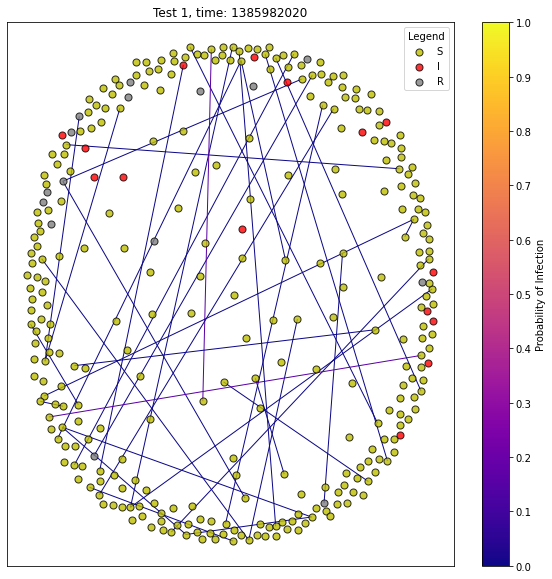

In [7]:
def drawContagion_nx(edgeList, nodeList, ts, exp_name = '', pos = None):
    #print("hi")
    if not os.path.exists('output/' + exp_name):
        os.makedirs('output/' + exp_name)
    
    plt.figure(figsize = (10,10))

    #for ts in [list(edgeList.keys())[0]]: #list(edgeList.keys())):
    print('Drawing the graph for time ' + str(ts))
        
    I = []
    S = []
    R = []
        
    G = nx.Graph()
    G.add_nodes_from(list(nodeList.keys()))
    #print('Nodes: ', G.nodes())
    #print(edgeList[ts])
    G.add_edges_from(edgeList[ts])
    #nx.draw(G)
    #G_gv = nx.nx_agraph.to_agraph(G)
    #print(G_gv.get_node('0'))
    
    for node, vals in nodeList.items():
        if vals['status'] == 'I':
            I.append(node)
        elif vals['status'] == 'S':
            S.append(node)
        elif vals['status'] == 'R':
            R.append(node)
    
    edge_probs = []
    for edge in edgeList[ts]:
        if nodeList[edge[0]]['status'] == 'I':
            if nodeList[edge[1]]['status'] == 'S':
                edge_probs.append(nodeList[edge[0]]['infect_prob'])
        
        elif nodeList[edge[1]]['status'] == 'I':
            if nodeList[edge[0]]['status'] == 'S':
                edge_probs.append(nodeList[edge[1]]['infect_prob'])
        else:
            edge_probs.append(nodeList[edge[0]]['infect_prob'])
        #G.edges()[edge]['weight'] = edge_colors[-1]
    #print(edge_probs)
    
    norm = mc.Normalize(vmin=0.0, vmax=1.0, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap='plasma')
    edge_colors = []
    for v in edge_probs:
        edge_colors.append(mapper.to_rgba(v))
    
    # nodes
    nx.draw_networkx_nodes(G,pos,
                       nodelist=S,
                       node_color='y',
                       node_size=50,
                       alpha=0.8,
                       label = 'S').set_edgecolor('k');
    nx.draw_networkx_nodes(G,pos,
                       nodelist=I,
                       node_color='r',
                       node_size=50,
                       alpha=0.8,
                       label = 'I').set_edgecolor('k');
    nx.draw_networkx_nodes(G,pos,
                       nodelist=R,
                       node_color='gray',
                       node_size=50,
                       alpha=0.8,
                       label = 'R').set_edgecolor('k');

    # edges
    e_cb = nx.draw_networkx_edges(G, pos, width=1.0,
                           edge_cmap = 'plasma',
                           edge_vmin = 0, edge_vmax = 1.0,
                           edge_color = edge_colors);
    
    labels={n:str(n) for n in nodeList.keys()}
    #nx.draw_networkx_labels(G,pos,labels,font_size=8)
    
    plt.legend(title = 'Legend');


    cbar = plt.colorbar(e_cb, ticks = np.arange(0.0, 1.1, 0.1), label = 'Probability of Infection')
    cbar.ax.set_yticklabels([str(round(n, 1)) for n in np.arange(0.0, 1.1, 0.1)])
    
    plt.title('Test 1, time: ' + str(int(ts)))
    plt.savefig('output/' + exp_name + 'simTime_{0:05d}.jpg'.format(int(ts)))
    #--------------------------------------------------------------------------

G_temp = nx.Graph()
for t in edgeList.keys():
    #all_edges_inTime.add(edgeList[t])
    G_temp.add_edges_from(edgeList[t])
print(1/np.sqrt(len(nodes)))

pos = nx.spring_layout(G_temp, k = 2.5)
for i in list(edgeList.keys())[:1]:
    drawContagion_nx(edgeList, nodeList, i, exp_name = 'testing_drawFunc_nx/', pos = pos)

In [21]:
def vl_prob(viral_load):
    # update with implementation similar to what Dan has in testing paper
    if viral_load < 3:
        return 0.0
    elif viral_load >= 6:
        return 1.0
    else:
        return (math.log10(viral_load) - math.log10(3))/math.log10(2) # check on this

In [7]:
#plot stats here
import pickle 

#load in pickle files
exp_name = ['static_SIR', 'static_VL', 'temporal_SIR', 'temporal_VL']
tmax = [48, 48, 67, 67]
edge_lists = []
node_lists = []

edge_lists.append(pickle.load( open( "output/" + exp_name[0] + "/edge_list.p", "rb" ) ))
node_lists.append(pickle.load( open( "output/" + exp_name[0] + "/node_list.p", "rb" ) ))


edge_lists.append(pickle.load( open( "output/" + exp_name[1] + "/edge_list.p", "rb" ) ))
node_lists.append(pickle.load( open( "output/" + exp_name[1] + "/node_list.p", "rb" ) ))


edge_lists.append(pickle.load( open( "output/" + exp_name[2] + "/edge_list.p", "rb" ) ))
node_lists.append(pickle.load( open( "output/" + exp_name[2] + "/node_list.p", "rb" ) ))


edge_lists.append(pickle.load( open( "output/" + exp_name[3] + "/edge_list.p", "rb" ) ))
node_lists.append(pickle.load( open( "output/" + exp_name[3] + "/node_list.p", "rb" ) ))

static_SIR 48 48
temporal_SIR 67 67


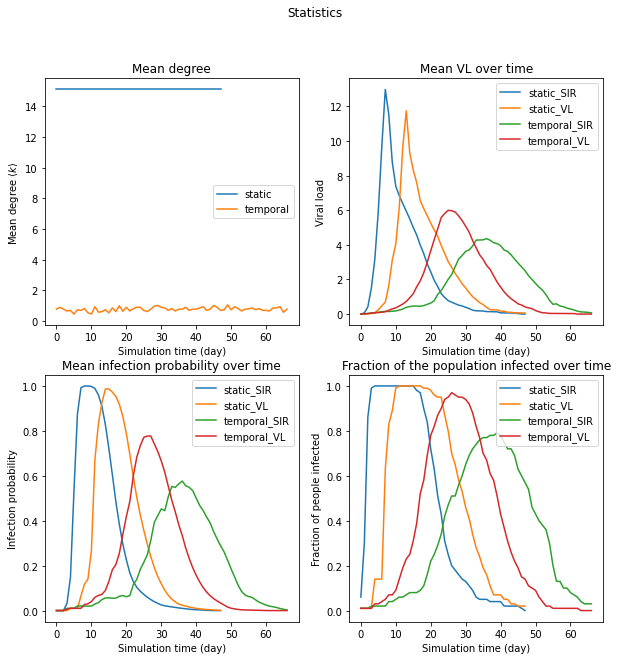

In [35]:
# do that plotting UPDATE
import math

time_steps = 'day'
plt.figure(figsize = (10,10))
#--------------------------------------------------------------------------
plt.subplot(221)
for i in [0,2]:
    mean_degree = []
    time = []
    for ts in range(tmax[i]):
        index = ts
        if len(edge_lists[i]) == 1:
            index = 0
            time.append(ts)
        else:
            time.append(list(edge_lists[i].keys())[index])

        G = nx.Graph()
        G.add_nodes_from(list(node_lists[i].keys()))
        G.add_edges_from(edge_lists[i][index])
        
        mean_degree.append((2*len(G.edges()))/len(G.nodes()))
    print(exp_name[i], len(mean_degree), len(time))
    plt.plot(time, mean_degree, label = exp_name[i].split('_')[0])

plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Mean degree ' + r'$\langle k \rangle$')
plt.title('Mean degree')
plt.legend()
#--------------------------------------------------------------------------
plt.subplot(222)

# for i in range(len(exp_name)):
#     times = []
#     for node in node_lists[i].keys():
#         time_inf = [t + node_lists[i][node]['infect_time'] for t in np.arange(len(node_lists[i][node]['viral_loads']))]

#         vls = []
#         for vl in node_lists[i][node]['viral_loads']:
#             if vl <= 0:
#                 vls.append(0.0)
#             else:
#                 vls.append(math.pow(10, vl))
#         plt.plot(time_inf, vls, label = exp_name[i])
        
for i in range(len(exp_name)):
    times = list(np.arange(0, tmax[i]))
    vl_inf = []
    for ts in range(tmax[i]):
        vl = 0
        for node in node_lists[i].keys():
            if node_lists[i][node]['infect_time'] <= ts and ts < node_lists[i][node]['remove_time']:
                viral_load = node_lists[i][node]['viral_loads'][ts - node_lists[i][node]['infect_time']]
                vl = vl + viral_load
                
        vl_inf.append(vl/len(node_lists[i].keys()))
    plt.plot(times, vl_inf, label = exp_name[i])

plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Viral load')
plt.title('Mean VL over time')
plt.legend()
#--------------------------------------------------------------------------
plt.subplot(223)
#do this how we talked about with Owen

for i in range(len(exp_name)):
    times = list(np.arange(0, tmax[i]))
    prob_inf = []
    for ts in range(tmax[i]):
        inf = 0
        prob = 0
        for node in node_lists[i].keys():
            if node_lists[i][node]['infect_time'] <= ts and ts < node_lists[i][node]['remove_time']:
                viral_load = node_lists[i][node]['viral_loads'][ts - node_lists[i][node]['infect_time']]
                inf = inf + 1
                prob = prob + vl_prob(viral_load)
                
        prob_inf.append(prob/len(node_lists[i].keys()))
    plt.plot(times, prob_inf, label = exp_name[i])

plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Infection probability')
plt.title('Mean infection probability over time')
plt.legend()
#--------------------------------------------------------------------------
plt.subplot(224)

for i in range(len(exp_name)):
    times = list(np.arange(0, tmax[i]))
    frac_inf = []
    for ts in range(tmax[i]):
        inf = 0
        for node in node_lists[i].keys():
            if node_lists[i][node]['infect_time'] <= ts and ts <= node_lists[i][node]['remove_time']:
                inf = inf + 1
        frac_inf.append(inf/len(node_lists[i].keys()))
    plt.plot(times, frac_inf, label = exp_name[i])
            
plt.xlabel('Simulation time (' + time_steps + ')')
plt.ylabel('Fraction of people infected')
plt.title('Fraction of the population infected over time')
plt.legend()

plt.suptitle('Statistics')
plt.savefig('stats.jpg', bbox_inches = 'tight')
#plt.close()